In [3]:
import cv2
import numpy
import torch
from matplotlib import pyplot as plt
import random
from PIL import Image

In [5]:
filepath = './data/pseudo_samples/ENV1_train/ENV1_train.pth'
samples_list = torch.load(filepath)
print(len(samples_list)) #generated # of samples

170712


In [7]:
print(samples_list[0])

['0000.png', 'useless placeholder', [164.33587646484375, 99.26416778564453, 189.36309814453125, 135.937744140625], 'red can', 'useless placeholder']


## Make Random Color List

In [6]:
color_list = []
for i in range(30):
    r = random.randint(50,200)
    g = random.randint(50,150)
    b = random.randint(50,180)
    rgb = (r,g,b)
    color_list.append(rgb)
print(color_list)

[(189, 144, 89), (160, 93, 56), (198, 97, 58), (169, 108, 106), (80, 141, 139), (105, 62, 56), (147, 109, 83), (85, 67, 146), (91, 137, 162), (106, 126, 90), (78, 148, 69), (50, 137, 103), (200, 63, 77), (147, 73, 153), (197, 149, 111), (153, 110, 157), (53, 120, 89), (123, 75, 71), (196, 82, 89), (72, 94, 173), (147, 108, 98), (90, 89, 180), (143, 137, 129), (63, 71, 56), (50, 89, 171), (132, 96, 157), (80, 104, 125), (90, 144, 89), (152, 73, 169), (51, 102, 135)]


## Show image with instructions

red can
middle red can
center red can
red can next to red can
red can on the right side of red can
red can next to can
red can on the left side of can
red can next to bottle
red can on the right side of bottle
red can in front of bottle
leftmost can
left can
can next to red can
can on the left side of red can
can next to bottle
can on the left side of bottle
can behind of shoe
red can
red can in behind
red can next to red can
red can on the left side of red can
red can next to can
red can on the right side of can
red can behind of bottle
red can next to bottle
red can on the left side of bottle
red can behind of shoe
can on the right side of the table
rightmost can
right can
can next to red can
can on the right side of red can
can in front of toy
toy on the right side of the table
toy on the top right of the table
toy behind of can
toy next to bottle
toy on the right side of bottle
leftmost bottle
left bottle
bottle in front
bottle next to red can
bottle on the left side of red can
bot

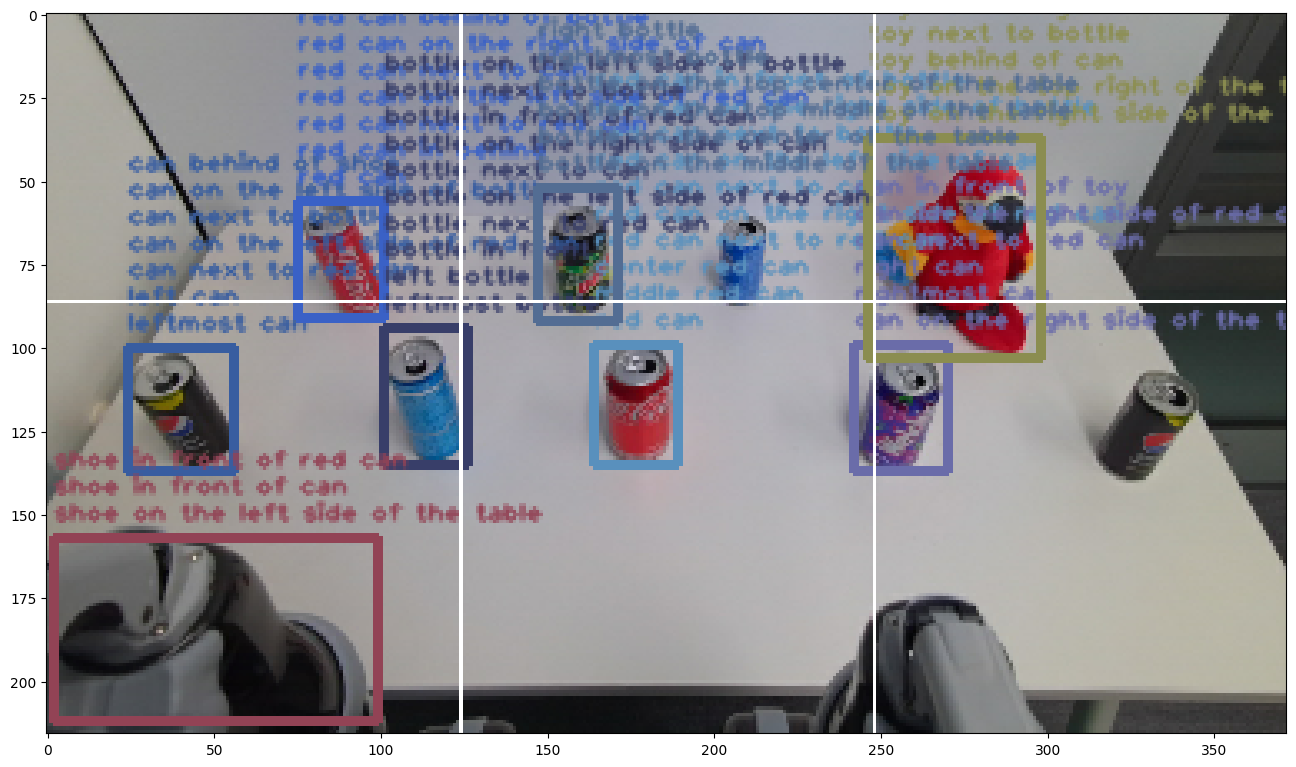

In [8]:
import numpy as np
from PIL import Image

plt.rcParams["figure.figsize"] = (16, 16)

query_num = 0
query_image = samples_list[query_num][0]

image_filepath = '../data/train/ENV1_train/' + query_image

image = Image.open(image_filepath)
img = cv2.cvtColor(numpy.asarray(image), cv2.COLOR_RGB2BGR)

box_temp = []
sample_num = 0
text_idx = [0]*100

for i,data_sample in enumerate(samples_list):
    if data_sample[0] == query_image:
        sample_num += 1
        bbox = data_sample[2]
        if bbox in box_temp: # 같은 bbox!
            if data_sample[3].split(' ')[0] not in ['pick', 'grasp', 'fetch']:
                text_idx[box_temp.index(bbox)] += 1
        else:
            box_temp.append(bbox)
            cv2.rectangle(
                img,
                (int(bbox[0]), int(bbox[1])),
                (int(bbox[2]), int(bbox[3])),
                color_list[box_temp.index(bbox)],
                2
            )
        if data_sample[3].split(' ')[0] not in ['pick', 'grasp', 'fetch']:
            img = cv2.putText(img, data_sample[3], (int(bbox[0]), int(bbox[1]-5)-8*text_idx[box_temp.index(bbox)]), cv2.FONT_HERSHEY_PLAIN, 0.5, color_list[box_temp.index(bbox)], 1, cv2.LINE_AA)
            print(data_sample[3])

print(img.shape)
w, h = img.shape[1], img.shape[0]

#### for location (on the table)
# top right, middle, left
cv2.line(img, (0, int(h*2/5)), (w, int(h*2/5)), (255,255,255), 1)
# right side, left side
#middle, center
cv2.line(img, (int(w*1/3),0), (int(w*1/3), h), (255,255,255), 1)
cv2.line(img, (int(w*2/3),0), (int(w*2/3), h), (255,255,255), 1)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(sample_num)

## Show image with instructions (one box by one)

leftmost can
left can
can next to red can
can on the left side of red can
can next to bottle
can on the left side of bottle
can behind of shoe


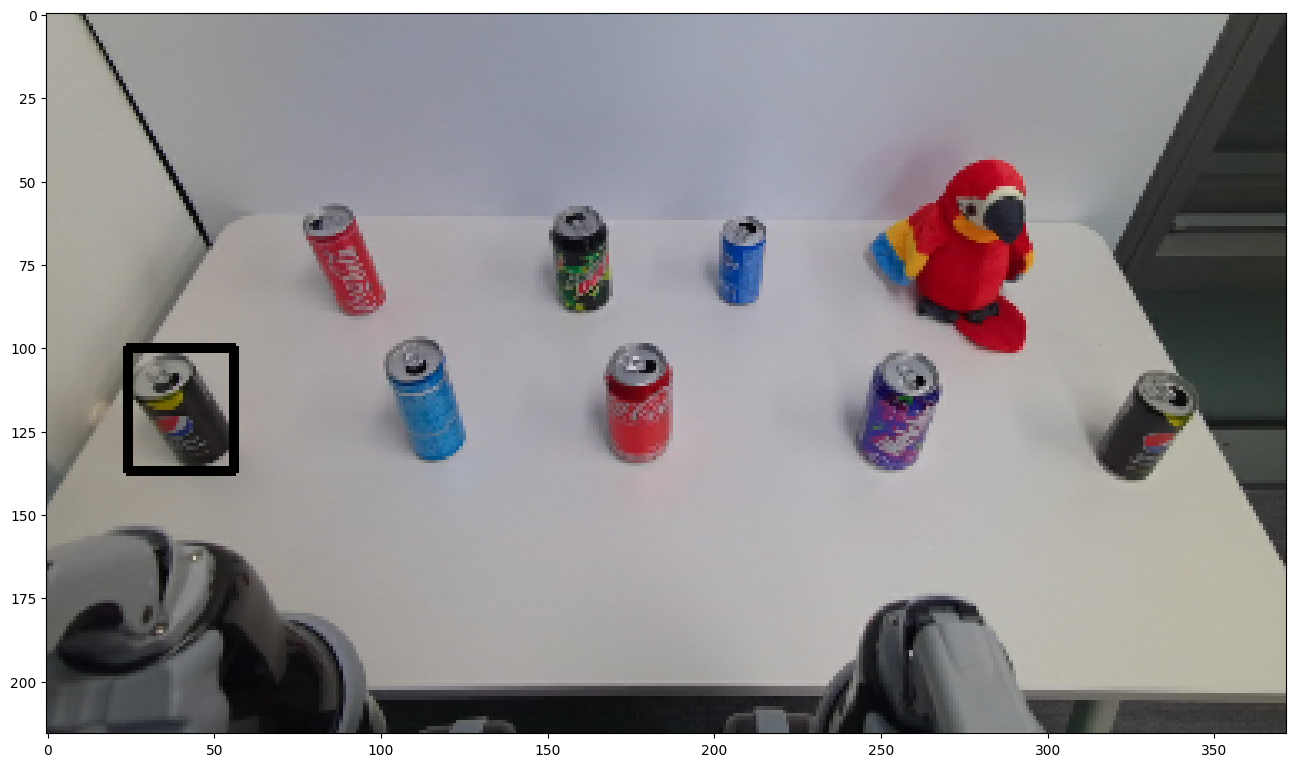

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams["figure.figsize"] = (16, 16)

box_to_ask = 2

image = Image.open(image_filepath)
img = cv2.cvtColor(numpy.asarray(image), cv2.COLOR_RGB2BGR)

box_temp = []
sample_num = 2
text_idx = [0]*100

flag = 0
for i,data_sample in enumerate(samples_list):
    if data_sample[0] == query_image:
        sample_num += 1
        bbox = data_sample[2]
        if bbox in box_temp: # 같은 bbox!
            if flag == box_to_ask:
                print(data_sample[3])
        else:
            flag += 1
            box_temp.append(bbox)
            if flag == box_to_ask: # n-th box check!!
                print(data_sample[3])
                cv2.rectangle(
                    img,
                    (int(bbox[0]), int(bbox[1])),
                    (int(bbox[2]), int(bbox[3])),
                    (0,0,0),
                    2
                )
            


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Save Annotated Image

In [72]:
annotated_img_path = ''
seen_img = []
save_cnt = 0
for j in range(len(samples_list)):
    if (samples_list[j][0] in seen_img) or int(samples_list[j][0].split('.')[0])<20:
        continue
    else:
        query_image = samples_list[j][0]
        seen_img.append(query_image)

        image = Image.open(image_filepath)
        img = cv2.cvtColor(numpy.asarray(image), cv2.COLOR_RGB2BGR)

        box_temp = []
        sample_num = 0
        text_idx = [0]*20

        for i,data_sample in enumerate(samples_list):
            if data_sample[0] == query_image:
                sample_num += 1
                bbox = data_sample[2]
                if bbox in box_temp:
                    #print("bbboxxx")
                    text_idx[box_temp.index(bbox)] += 1
                else:
                    box_temp.append(bbox)
                    cv2.rectangle(
                        img,
                        (int(bbox[0]), int(bbox[1])),
                        (int(bbox[2]), int(bbox[3])),
                        color_list[box_temp.index(bbox)],
                        3
                    )
                img = cv2.putText(img, data_sample[3], (int(bbox[0]), int(bbox[1]-10)-25*text_idx[box_temp.index(bbox)]), cv2.FONT_HERSHEY_PLAIN, 1, color_list[box_temp.index(bbox)], 2, cv2.LINE_AA)
                #print('injecting... {}'.format(data_sample[3]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imsave(annotated_img_path + samples_list[j][0], img)
        save_cnt += 1
        if save_cnt > 100:
            break